In [42]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:,.0f}'.format

In [55]:
# How is the Dominican poplulation determined in the census
# What are the top 5 states with the hightest dominican population
# What is the state with the fastest growing dominican population
# which state has the highest percentage of dominican population relative to the entire state population
# What is the projected dominican population in New york
# which borouhgs in New York are experiencing the highest growth in dominicna population?


In [15]:
# Build base url
HOST = 'https://api.census.gov/data'
dataset = 'acs/acs1'

# Specify Census variables and other predicates
get_vars = ['NAME', 'B01003_001E', 'B03001_001E', 'B03001_007E']
predicates = {}
predicates['get'] = ",".join(get_vars)
predicates['for'] = "state:*"
col_names = ['name', 'total_pop', 'total_hisc_pop', 'total_dominican_pop', 'state']


In [17]:
# Loop over years 2005 to 2020
dfs = []
for year in range(2005, 2020):
    base_url = '/'.join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    df = pd.DataFrame(columns=col_names, data=r.json()[1:])
    df['year'] = year
    dfs.append(df)

In [19]:
df = pd.concat(dfs)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 51
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 780 non-null    object 
 1   total_pop            780 non-null    float64
 2   total_hisc_pop       636 non-null    float64
 3   total_dominican_pop  636 non-null    float64
 4   state                780 non-null    object 
 5   year                 780 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.7+ KB


In [23]:
# Convert each column with numeric data to an appropriate type
df['total_pop'] = df.total_pop.astype(float)
df['total_hisc_pop'] = df.total_hisc_pop.astype(float)
df['total_dominican_pop'] = df.total_dominican_pop.astype(float)

In [30]:
df.head()

,name,total_pop,total_hisc_pop,total_dominican_pop,state
year,,,,,
2005,Alabama,"4,442,558","4,442,558",178,01
2005,Alaska,"641,724",nan,nan,02
2005,Arizona,"5,829,839","5,829,839","1,989",04
2005,Arkansas,"2,701,431",nan,nan,05
2005,California,"35,278,768","35,278,768","12,086",06


In [27]:
# Convert df to time series
df.set_index('year', inplace=True)

In [31]:
df.head()

,name,total_pop,total_hisc_pop,total_dominican_pop,state
year,,,,,
2005,Alabama,"4,442,558","4,442,558",178,01
2005,Alaska,"641,724",nan,nan,02
2005,Arizona,"5,829,839","5,829,839","1,989",04
2005,Arkansas,"2,701,431",nan,nan,05
2005,California,"35,278,768","35,278,768","12,086",06


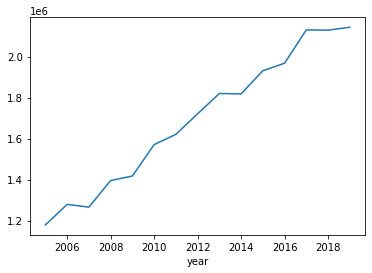

In [38]:
# Total dominican pop in the USA from 2005 to 2019
df.total_dominican_pop.groupby('year').sum().plot()

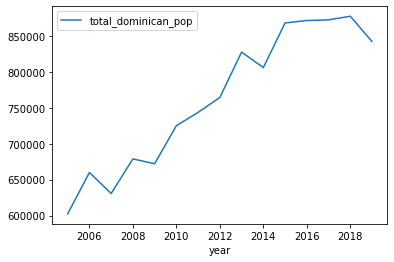

In [47]:
# Total dominican pop in New York from 2005 to 2019
df[df.name == 'New York'].plot(y ='total_dominican_pop')

In [50]:
df_pivot = df.pivot_table(values='total_dominican_pop', index='name', columns='year' )

In [53]:
df_pivot

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
name,,,,,,,,,,,,,,,
Alabama,178,137,354,943,616,600,"1,100",963,238,"1,198","1,902",837,"1,327","1,356","2,959"
Alaska,nan,nan,nan,nan,"3,351",nan,nan,"1,990",701,"2,360",nan,nan,nan,nan,nan
Arizona,"1,989","2,110","1,584","2,783","3,980","2,693","2,757","1,968","3,224","3,341","6,247","5,345","5,936","4,583","6,267"
Arkansas,nan,706,nan,nan,537,153,325,nan,182,366,"1,744",329,153,0,563
California,"12,086","5,915","12,863","8,369","10,327","11,079","14,286","18,626","16,458","15,157","16,098","14,778","18,381","19,305","16,422"
Colorado,511,"1,648",892,"2,521",737,"1,869","2,600","2,639","2,275","1,638","3,068","2,634","4,870","3,371","4,920"
Connecticut,"14,809","17,213","17,888","21,842","27,686","28,242","23,466","34,754","36,699","30,408","38,047","41,917","40,343","50,399","46,228"
Delaware,726,nan,nan,nan,nan,"1,452","1,626","2,661","1,906","2,274","4,443","3,760","3,672","4,386","2,163"
District of Columbia,"2,689","2,482","4,767","2,649","1,161","2,649","2,529","3,681","3,942","1,948","2,354","4,112","3,744","5,894","9,251"


In [57]:
df_pivot.pct_change(axis='columns')

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
name,,,,,,,,,,,,,,,
Alabama,nan,-0,2,2,-0,-0,1,-0,-1,4,1,-1,1,0,1
Alaska,nan,nan,nan,nan,nan,0,0,-0,-1,2,0,0,0,0,0
Arizona,nan,0,-0,1,0,-0,0,-0,1,0,1,-0,0,-0,0
Arkansas,nan,nan,0,0,-0,-1,1,0,-0,1,4,-1,-1,-1,inf
California,nan,-1,1,-0,0,0,0,0,-0,-0,0,-0,0,0,-0
Colorado,nan,2,-0,2,-1,2,0,0,-0,-0,1,-0,1,-0,0
Connecticut,nan,0,0,0,0,0,-0,0,0,-0,0,0,-0,0,-0
Delaware,nan,0,0,0,0,1,0,1,-0,0,1,-0,-0,0,-1
District of Columbia,nan,-0,1,-0,-1,1,-0,0,0,-1,0,1,-0,1,1
